# Analisi dati test 18/10/2023
Test: Fuel cell + dcdc + controller + carico. Senza short circuit.

# Analisi Dati DCDC
## Potenza richiesta vs potenza ottenuta

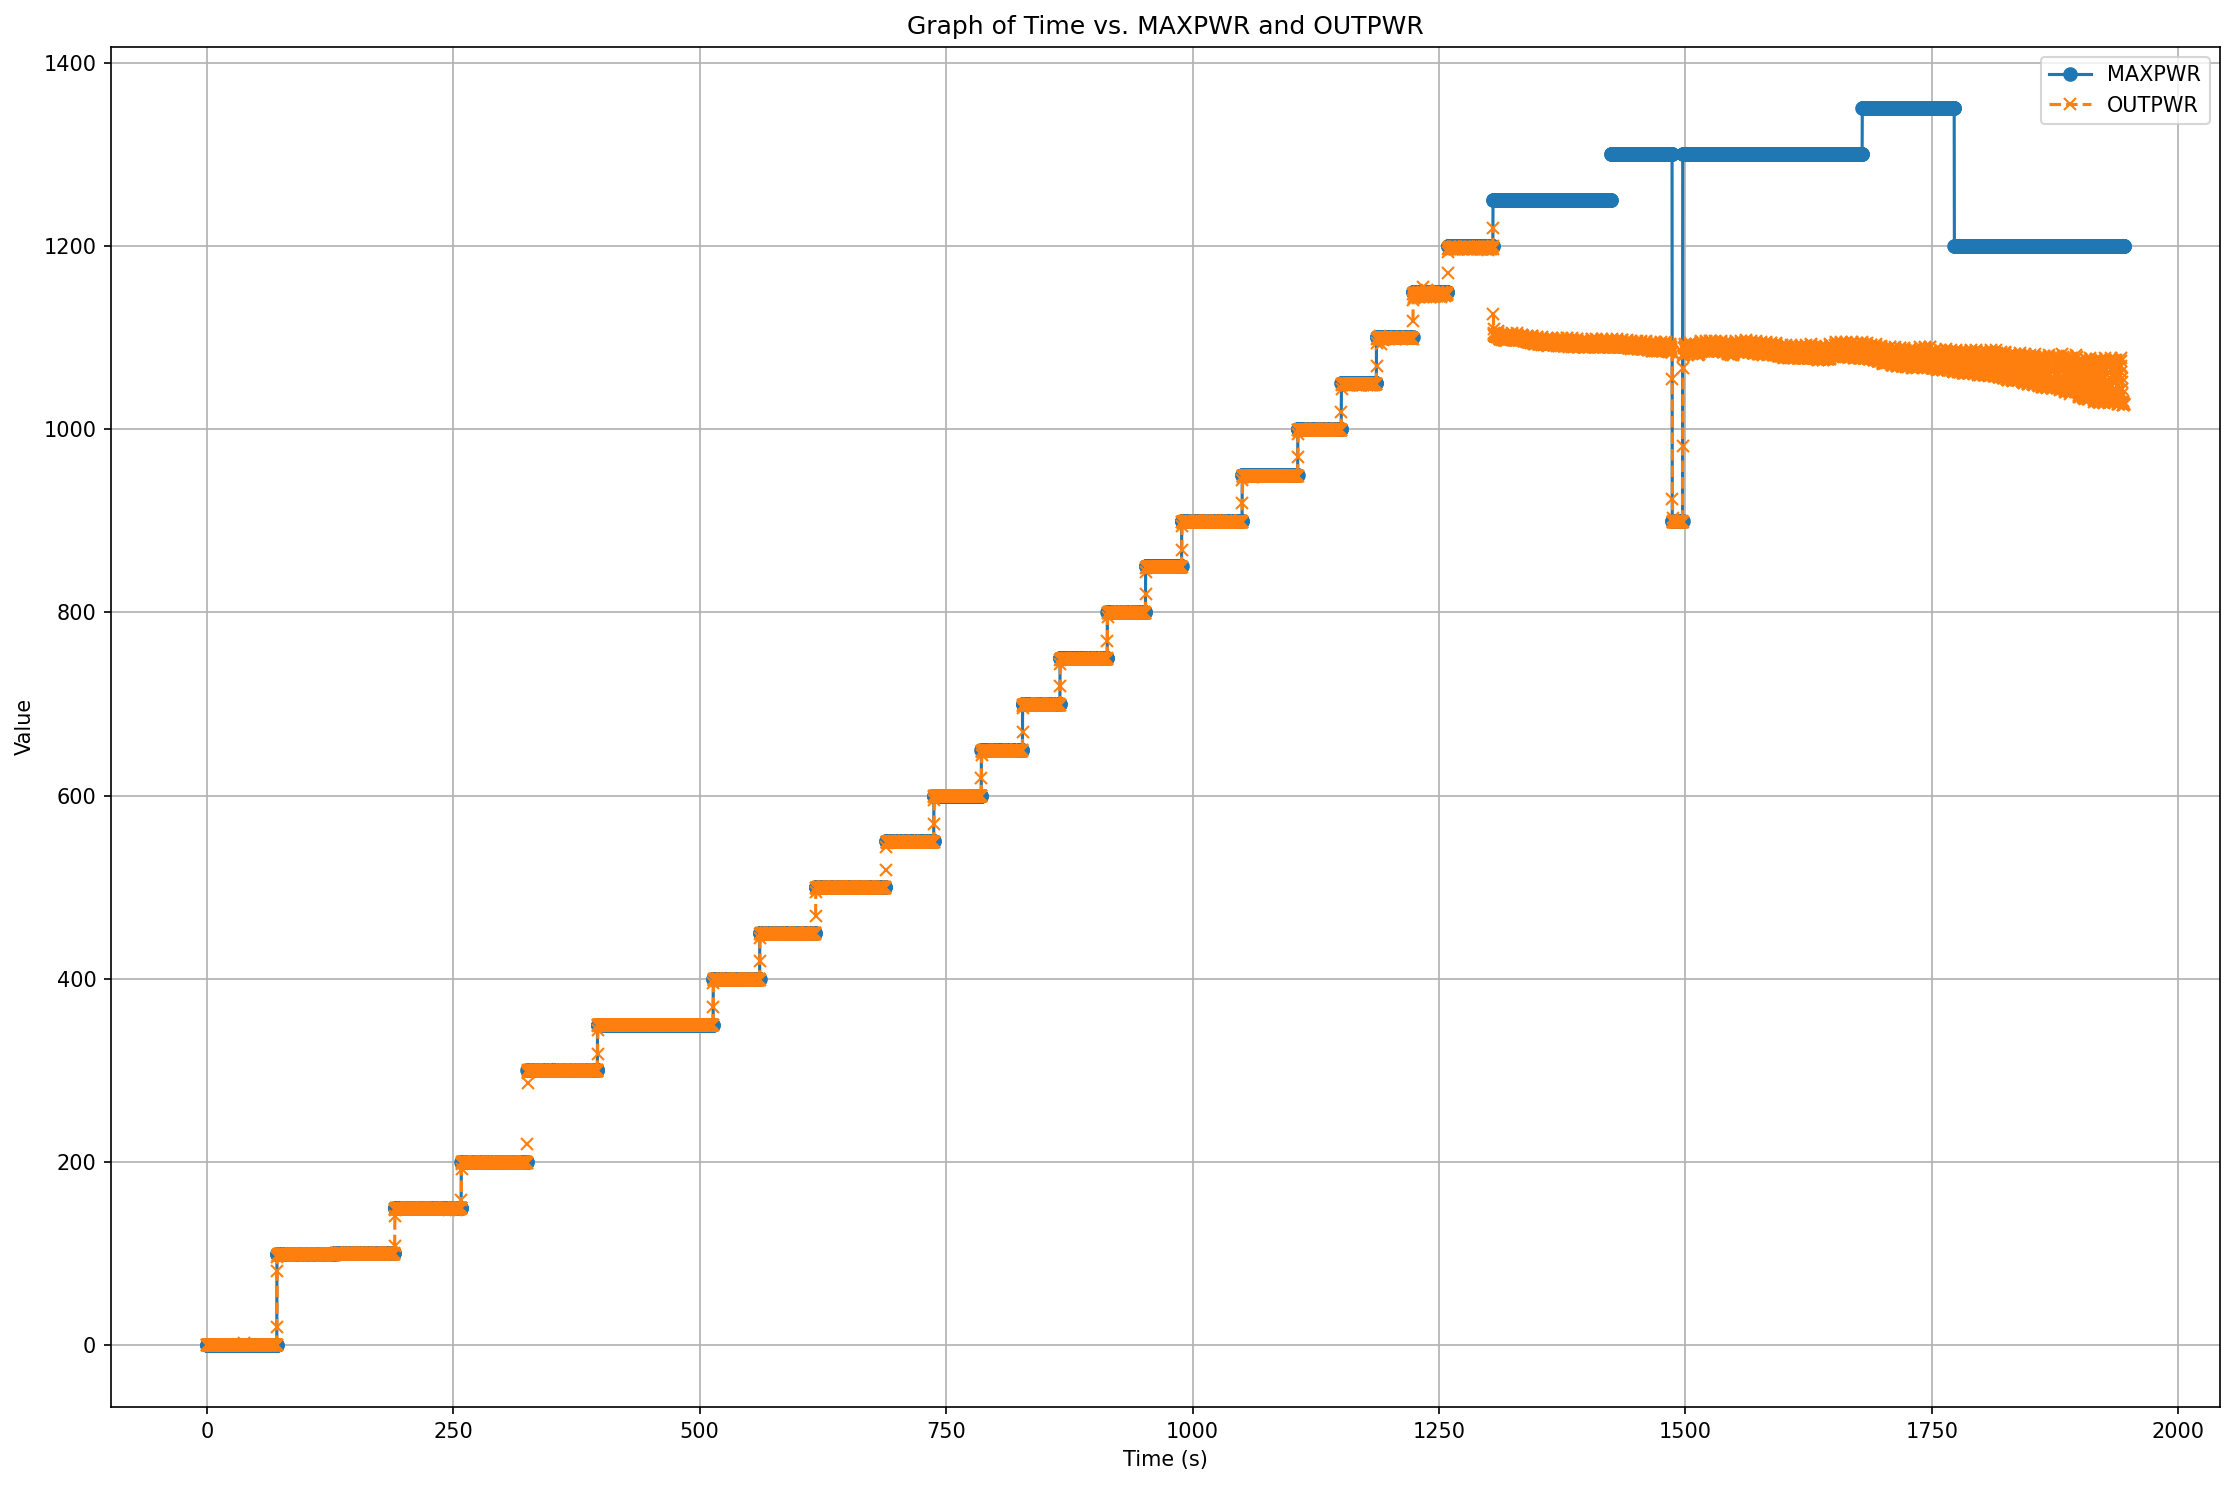

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data from CSV
df = pd.read_csv("101823/DCDCLogs181023.csv")
df = df[:-1800]
# Generate time data: 0, 0.2, 0.4, ... for the length of the dataframe
times = np.arange(0, 0.2 * len(df), 0.2)


# Columns to plot
y_column1 = 'MAXPWR'
y_column2 = 'OUTPWR'

# Plotting
plt.figure(figsize=(15, 10), dpi=150)

# Plot first column
plt.plot(times, df[y_column1], marker='o', linestyle='-', label=y_column1)

# Plot second column
plt.plot(times, df[y_column2], marker='x', linestyle='--', label=y_column2)


plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title(f'Graph of Time vs. {y_column1} and {y_column2}')
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# Polinomiale e MSE di temperatura vs potenza

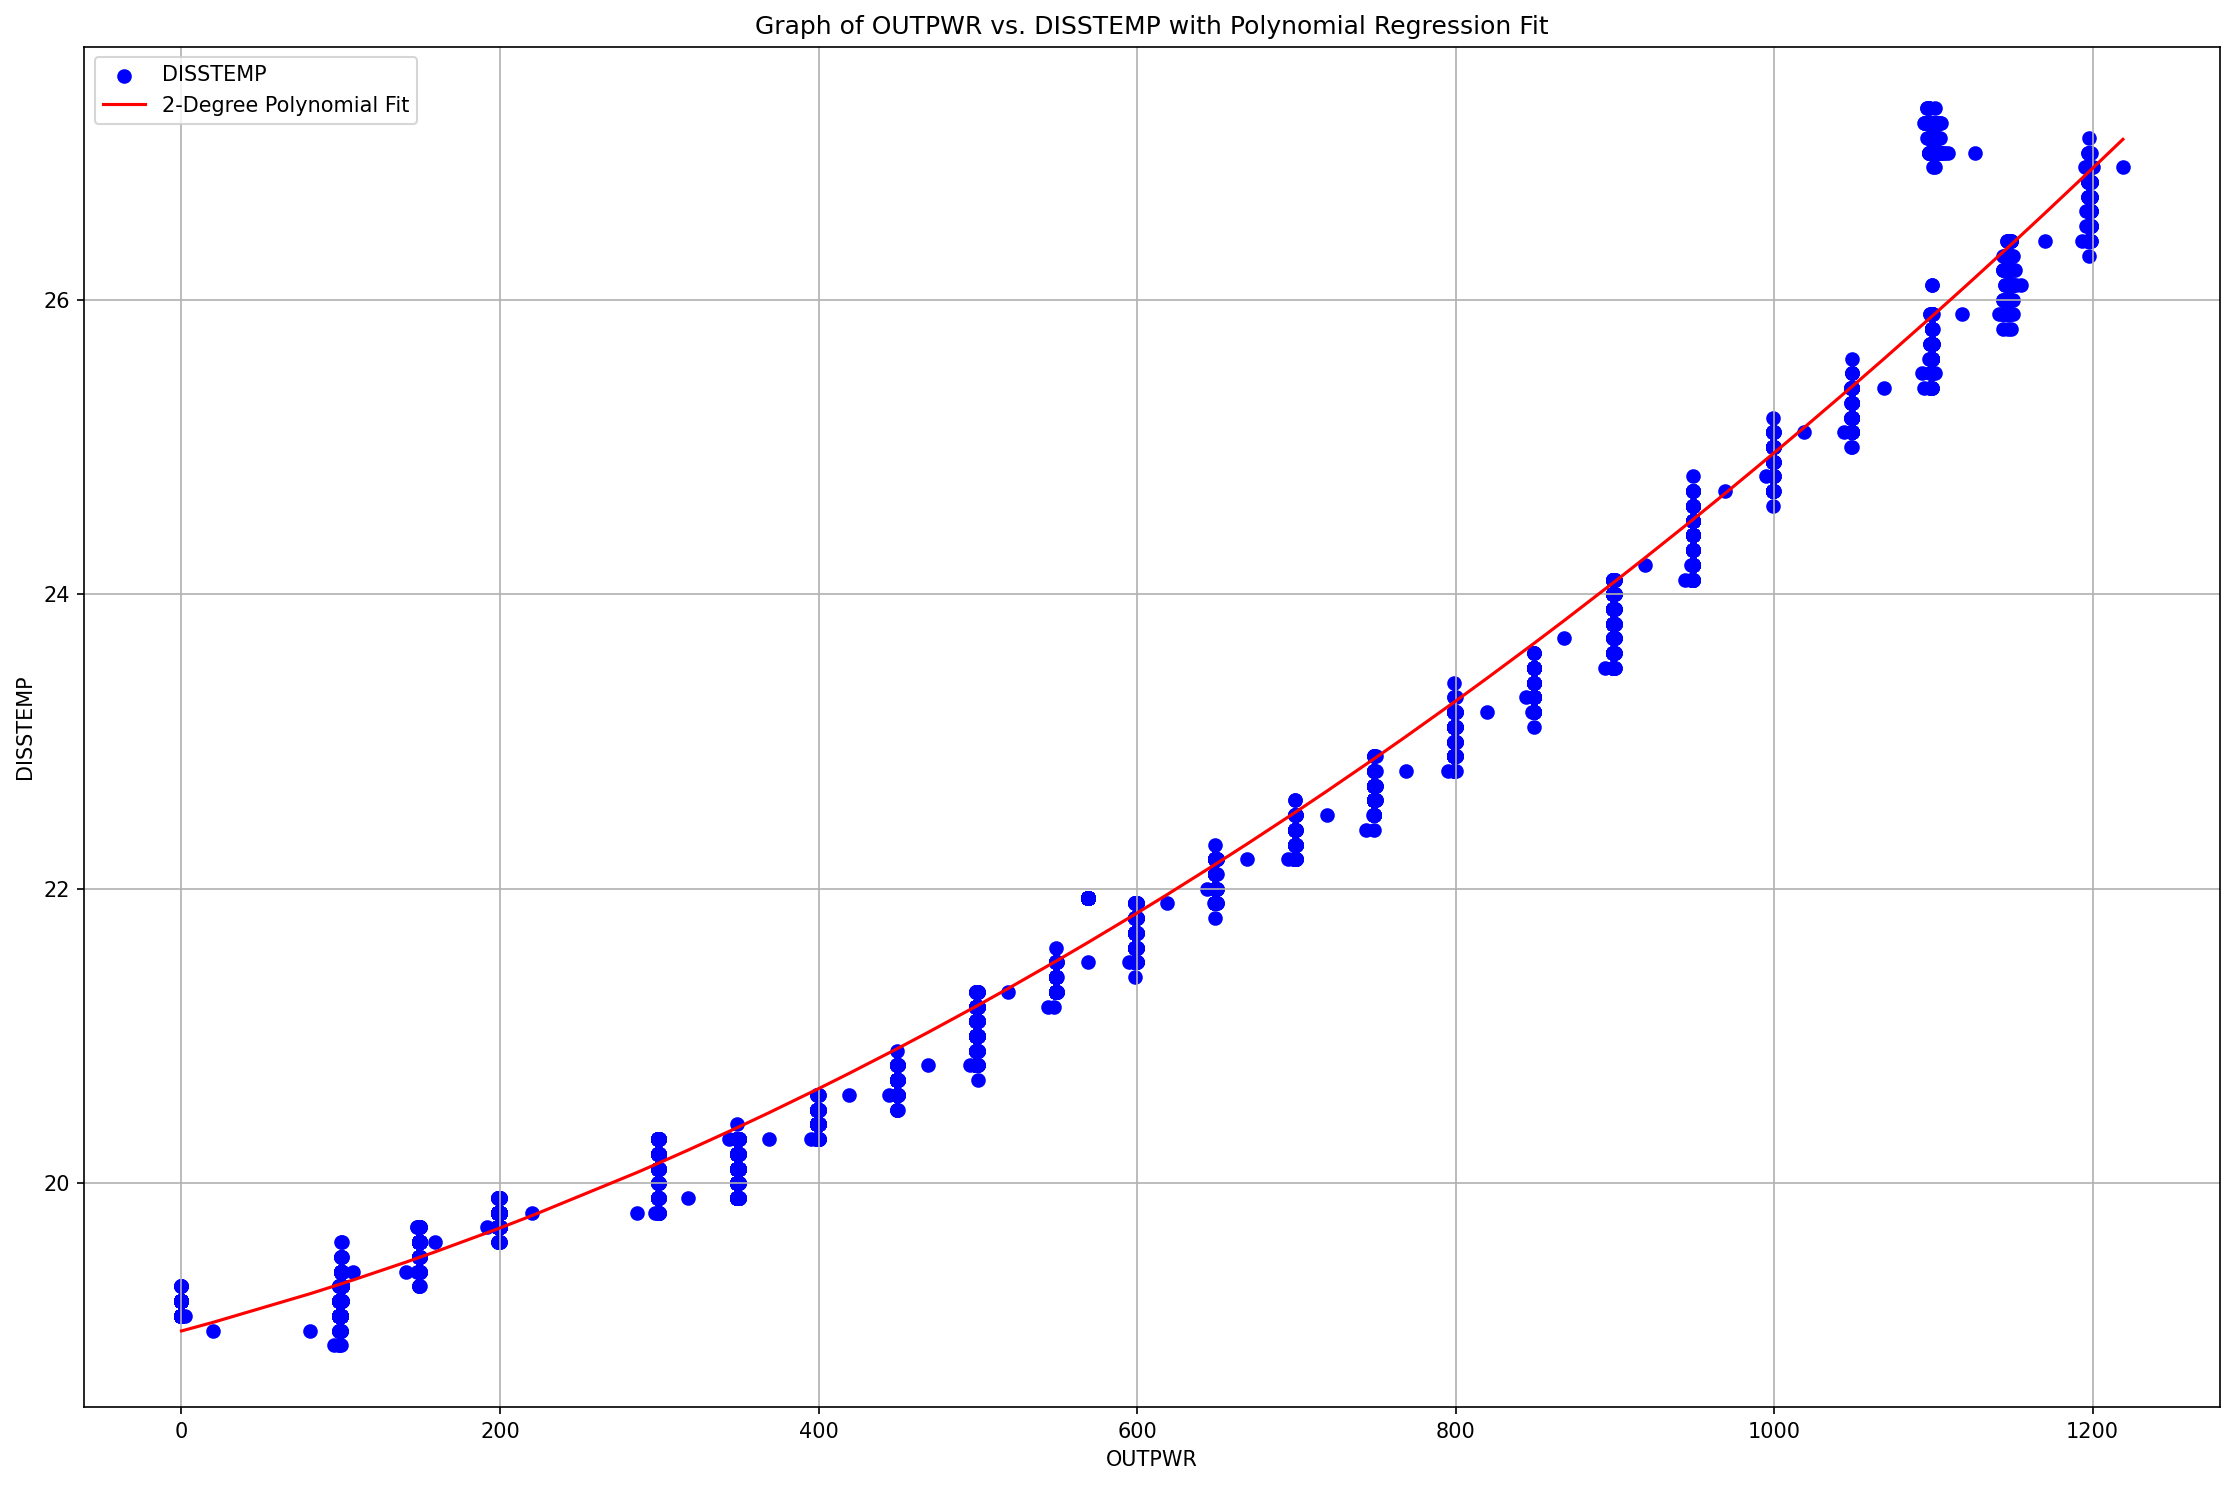

Mean Squared Error (MSE): 0.09209184952711794
Polynomial: y = 19.00 + 0.00287976x^1 + 0.00000308x^2


In [2]:
def polynomial_regression(data_path, y_col, x_col, degree, freq, removelast):
    df = pd.read_csv(data_path)
    df = df[:-removelast]

    # genero tempo in base a 5hz che so
    times = np.arange(0, (1/freq) * len(df), 1/freq)

    # preprocessing
    X = df[x_col].fillna(df[x_col].mean()).values.reshape(-1, 1)
    y = df[y_col].fillna(df[y_col].mean()).values

    # regression
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)

    # Sort per plot ordinato di regressione
    sorted_indices = X.flatten().argsort()
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Plot
    plt.figure(figsize=(15, 10), dpi=150)
    plt.scatter(X, y, marker='o', color='blue', label=y_col)
    plt.plot(X_sorted, y_pred_sorted, color='red', linestyle='-', label=f'{degree}-Degree Polynomial Fit')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Graph of {x_col} vs. {y_col} with Polynomial Regression Fit')
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Equazione stringa
    coefficients = model.coef_
    intercept = model.intercept_

    polynomial_string = f"y = {intercept:.2f}"
    for i, coef in enumerate(coefficients):
        if i == 0:  # skip the first coefficient
            continue
        if coef >= 0:
            polynomial_string += f" + {coef:.8f}x^{i}"
        else:
            polynomial_string += f" - {-coef:.8f}x^{i}"

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Polynomial: {polynomial_string}")

    return model, mse

# Example usage:
model, mse = polynomial_regression("101823/DCDCLogs181023.csv", 'DISSTEMP', 'OUTPWR', 2, 5, 4800)


## Tensione in input (FC) vs Potenza richiesta

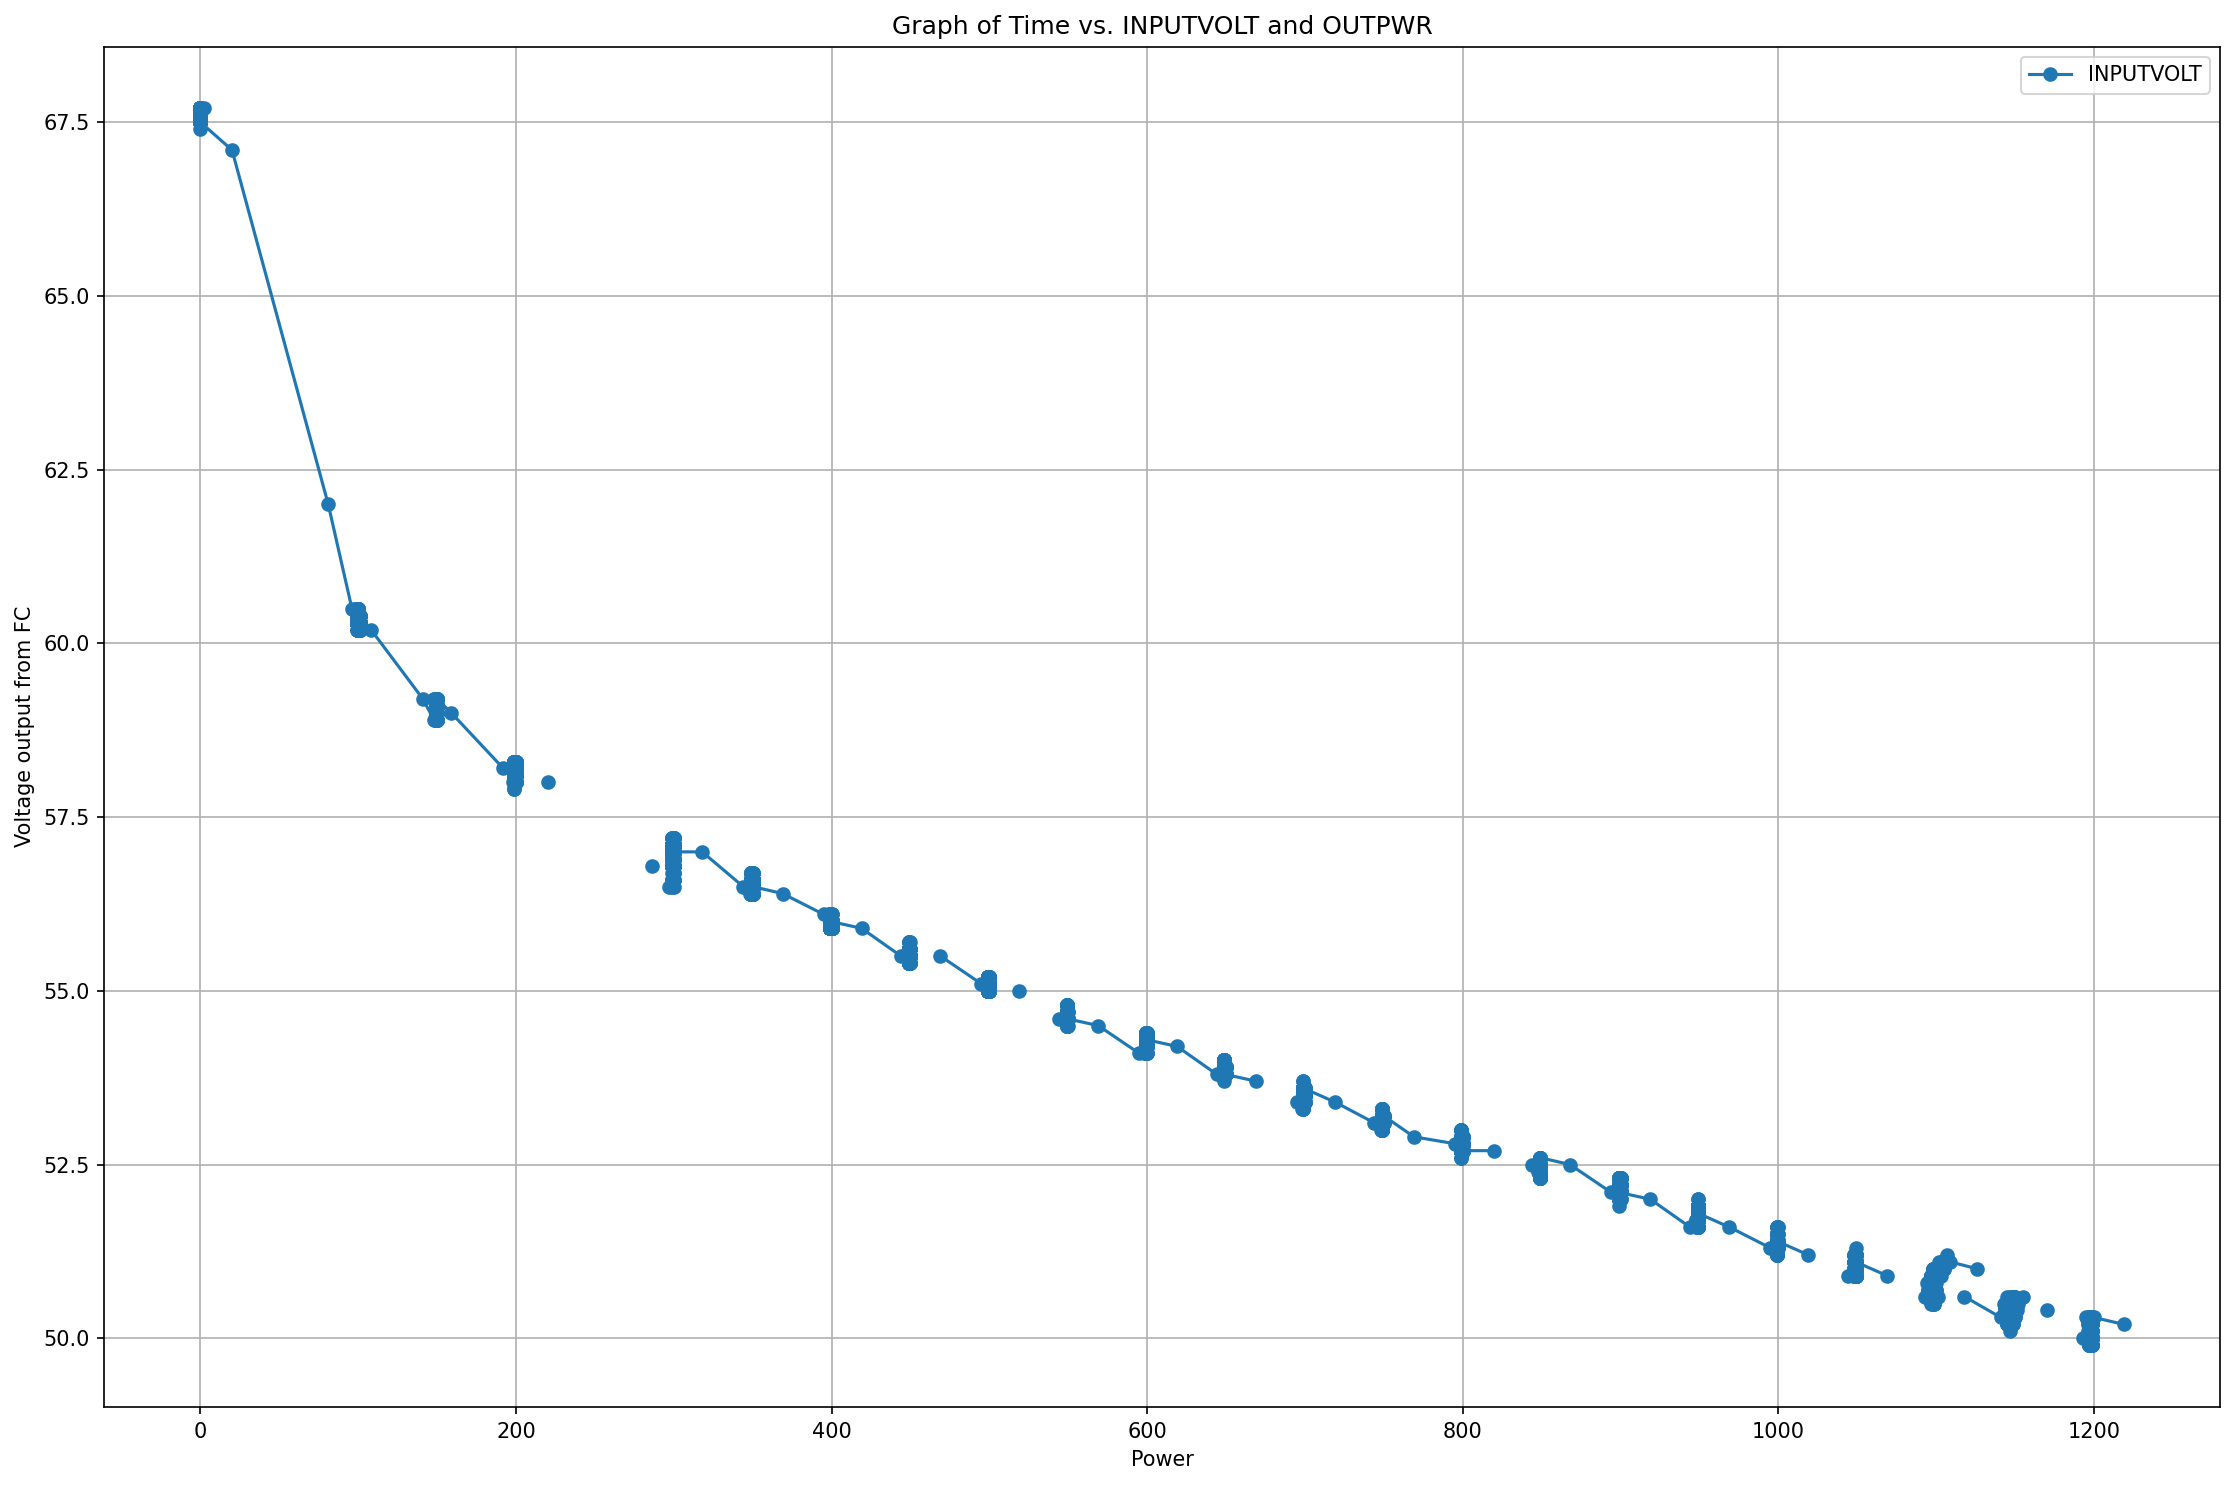

In [3]:
# Load data from CSV
df = pd.read_csv("101823/DCDCLogs181023.csv")
df = df[:-4800]
# Generate time data: 0, 0.2, 0.4, ... for the length of the dataframe
times = np.arange(0, 0.2 * len(df), 0.2)


# Columns to plot
y_column1 = 'INPUTVOLT'
y_column2 = 'OUTPWR'

# Plotting
plt.figure(figsize=(15, 10), dpi=150)

# Plot first column
plt.plot(df[y_column2], df[y_column1], marker='o', linestyle='-', label=y_column1)



plt.xlabel('Power')
plt.ylabel('Voltage output from FC')
plt.title(f'Graph of Time vs. {y_column1} and {y_column2}')
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


## Polinomiale + MSE Tensione in output al dcdc vs Potenza

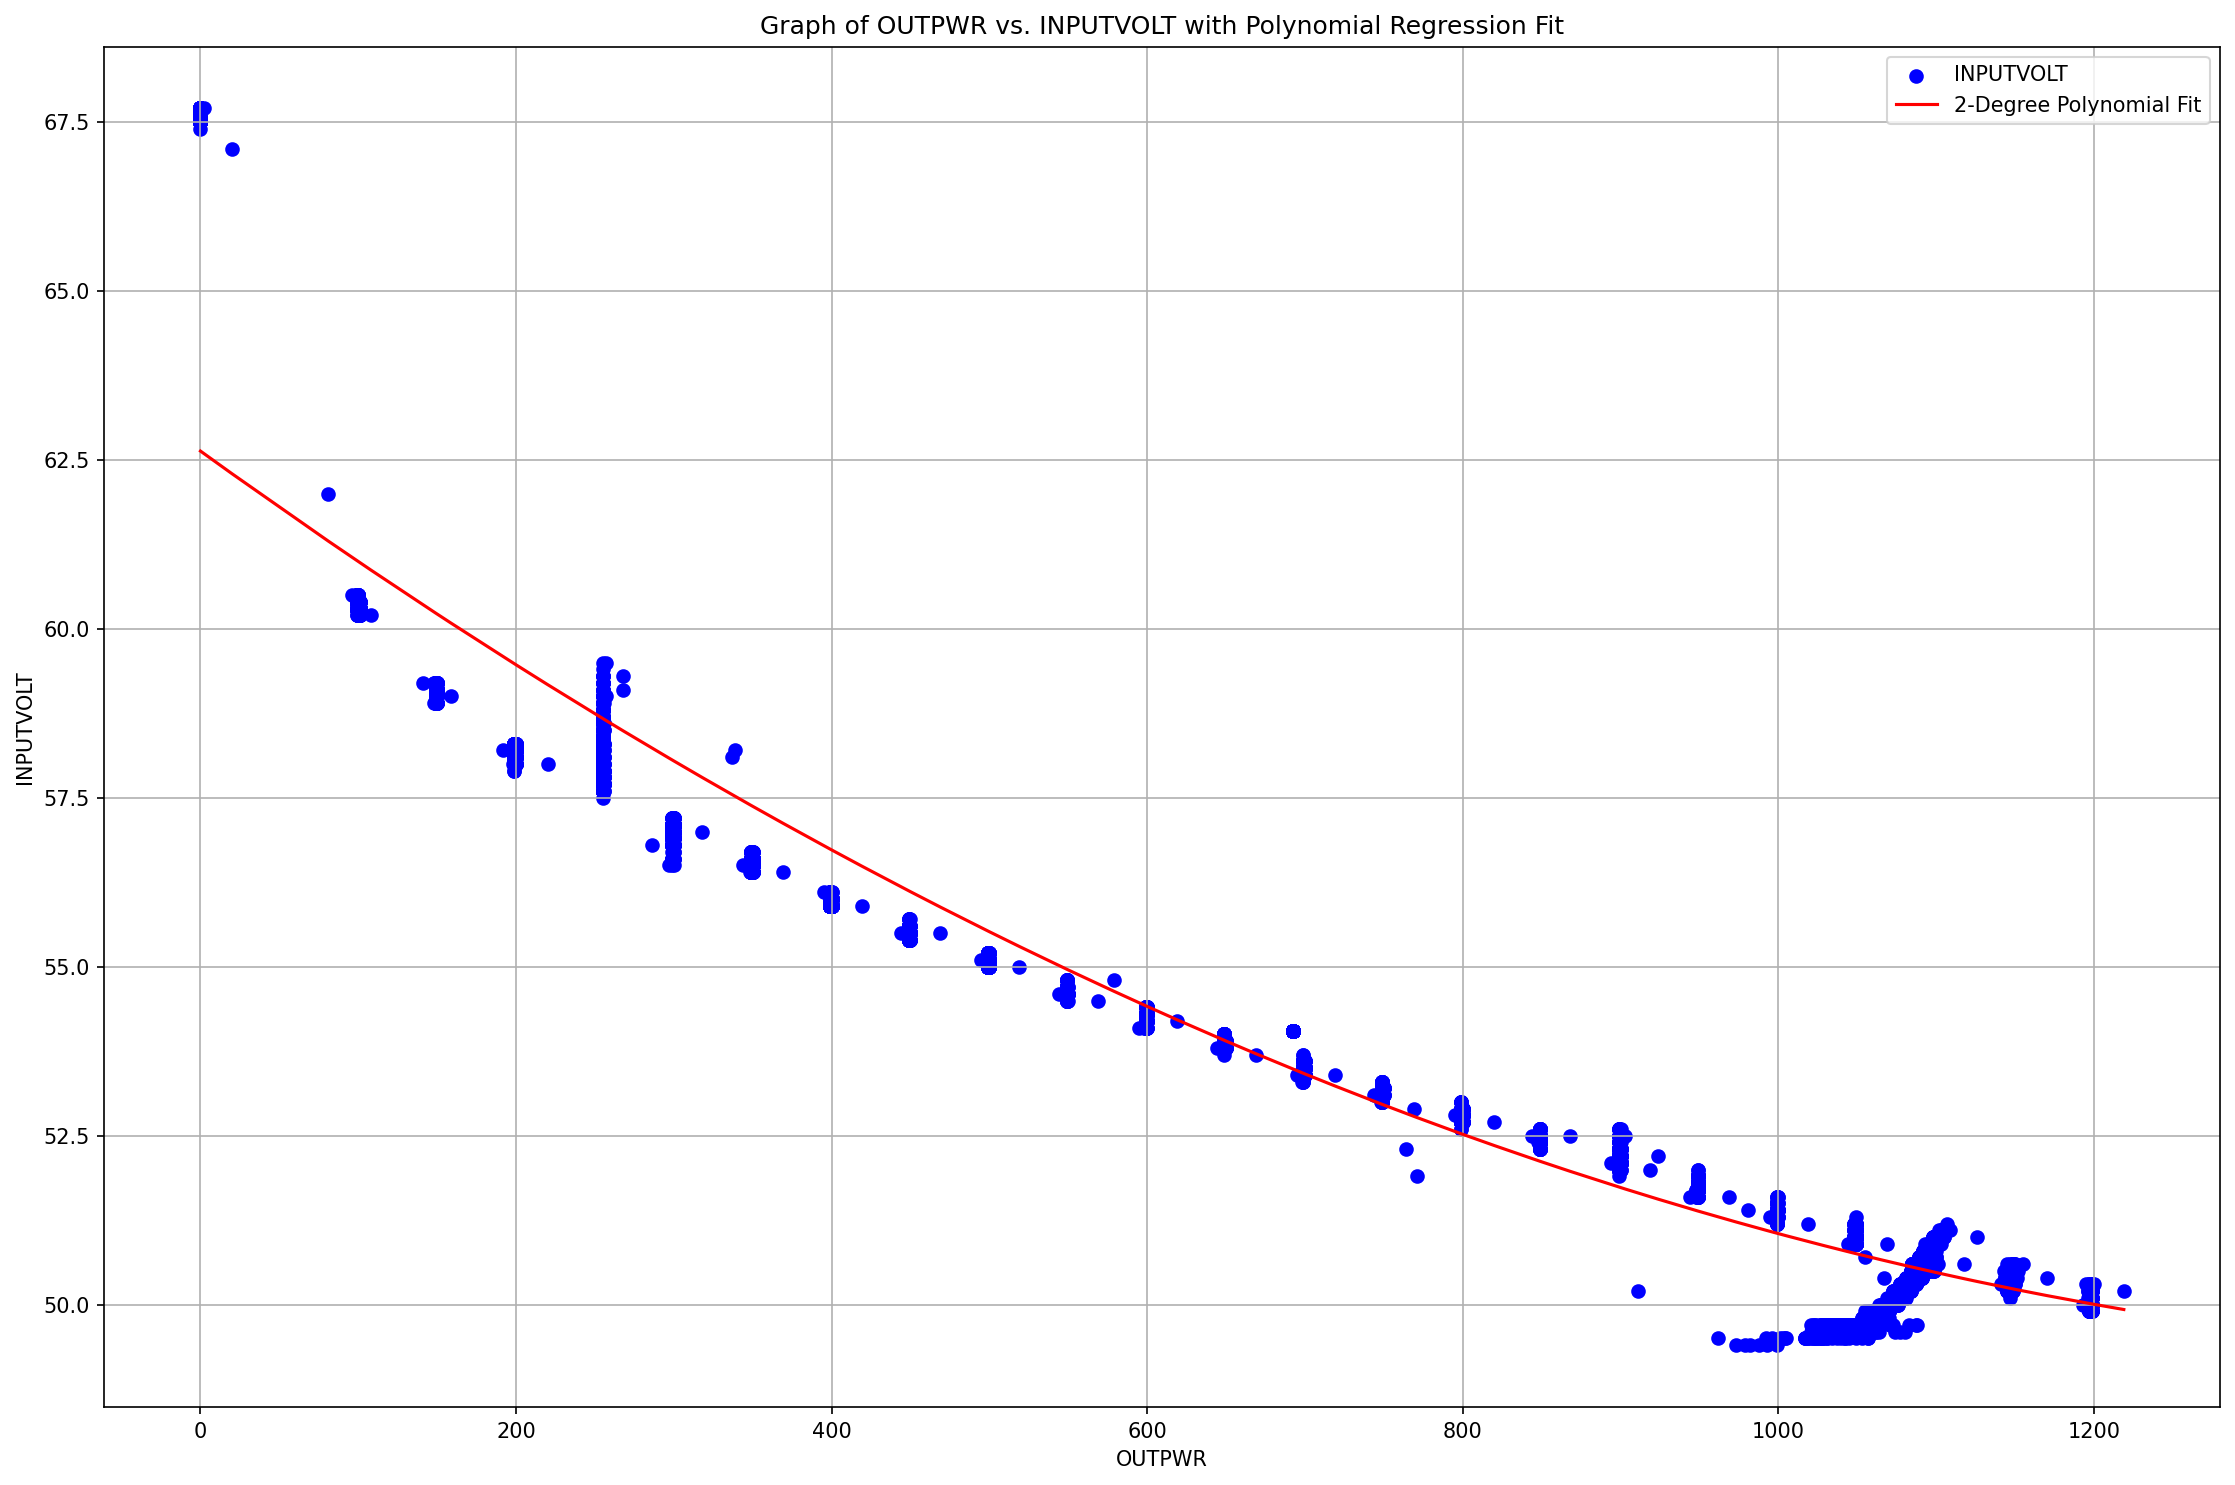

Mean Squared Error (MSE): 0.8738992288931986
Polynomial: y = 62.63 - 0.01686810x^1 + 0.00000529x^2


In [4]:
model, mse = polynomial_regression("101823/DCDCLogs181023.csv", 'INPUTVOLT', 'OUTPWR', 2, 5, 1)

# Analisi dati carico
Lo script dovrebbe essere in grado di organizzare i dati in colonne (se usi python in dataframe) pulire i valori NaN (ma non gli zeri) e organizzarli o in tempo o per corrente o tensione, poi plottare il data set e fare la regressione polinomiale fornendo MSE ed il polinomio

## H2 flow vs power

Lets add a power column

In [5]:

df = pd.read_csv('101823/231018-fclogCLEAN.csv')

df['P(W)'] = df['V[V]'] * df['I_meas[A]']

df.to_csv('101823/231018-fclogCLEAN-PWR.csv', index=False)

Lets plot

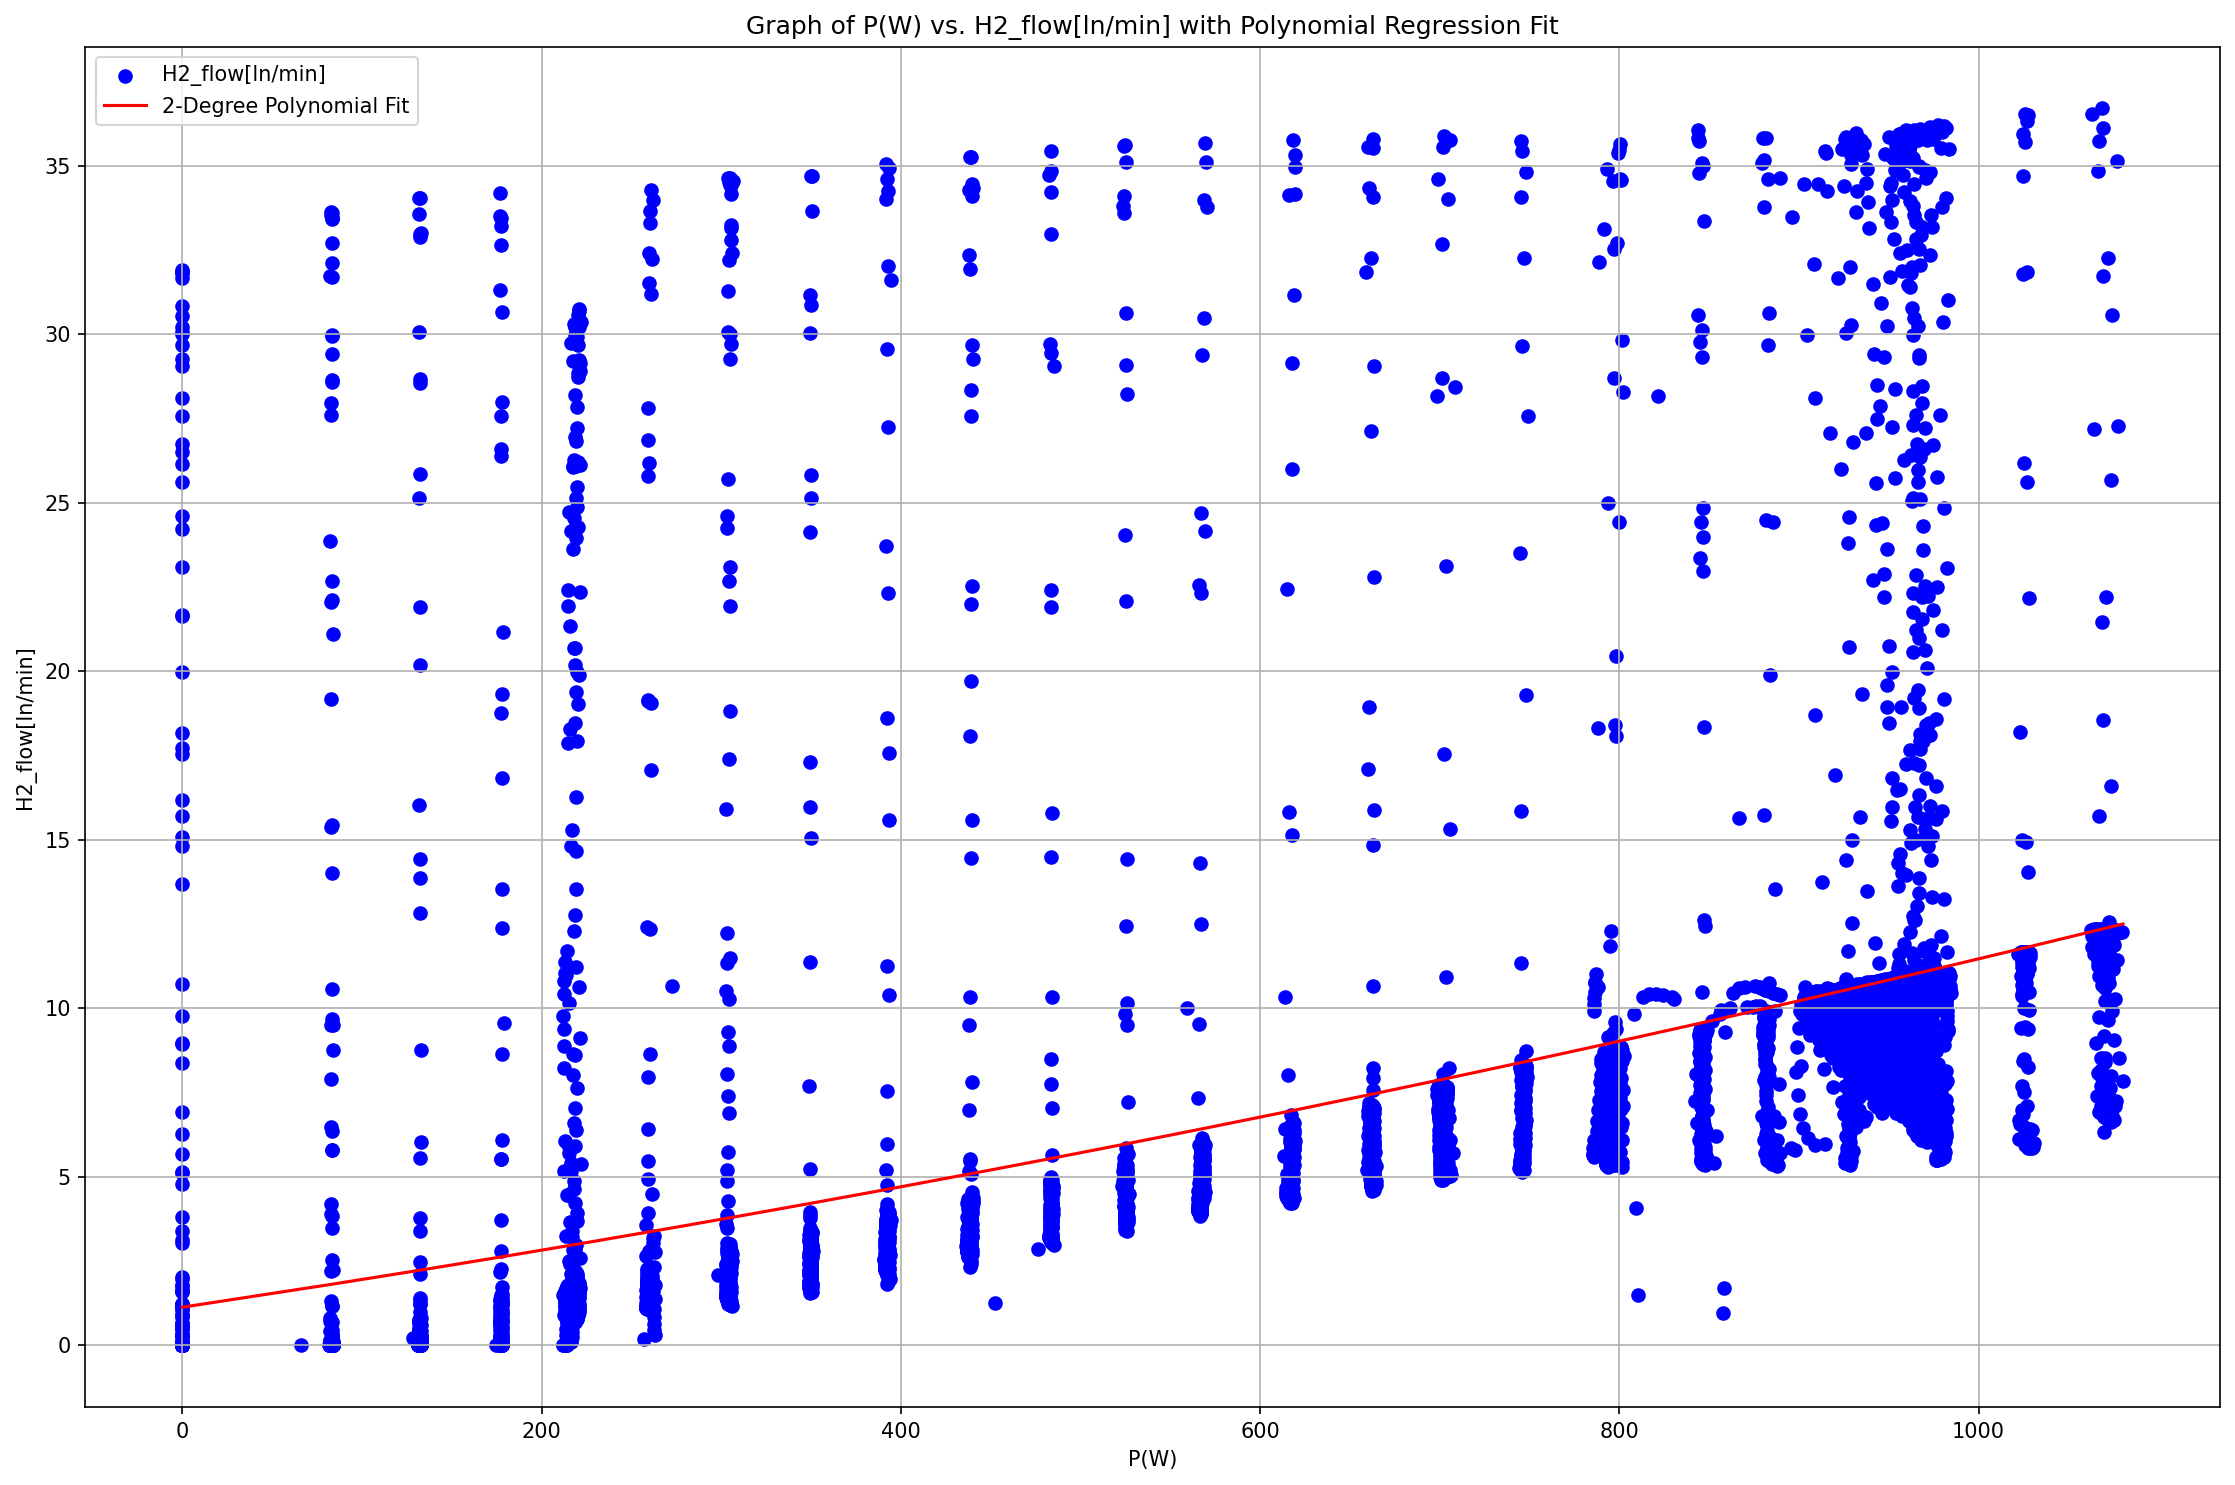

Mean Squared Error (MSE): 36.51171088013672
Polynomial: y = 1.13 + 0.00799409x^1 + 0.00000234x^2


In [6]:
#Modify data so that we have a line that has the power column

model, mse = polynomial_regression("101823/231018-fclogCLEAN-PWR.csv", 'H2_flow[ln/min]', 'P(W)', 2, 5, 1)

In [10]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,matplotlib,scikit-learn
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

pandas      : 1.4.2
numpy       : 1.21.5
matplotlib  : 3.5.1
scikit-learn: 1.0.2

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 22.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Last updated: Mon Oct 23 2023 00:15:36CEST

